In [1]:
#import the necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Dropout

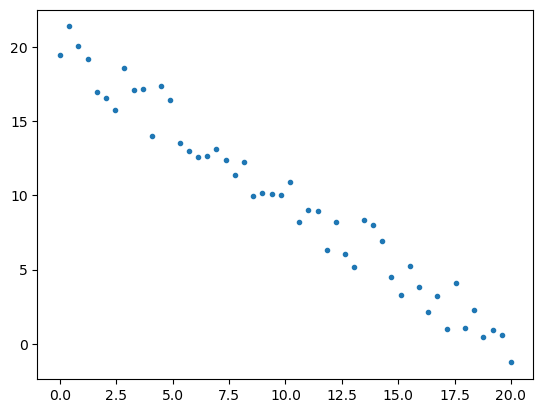

In [2]:
#define a random seed
np.random.seed(42)
 
#create random points for the x and y axis from 0 to 20
xs = np.linspace(0, 20, 50)
ys = np.linspace(20, 0, 50)
 
# add some positive and negative noise on the y axis
ys += np.random.uniform(-2, 2, 50)
 
#plot the graph
plt.plot(xs, ys, '.');

In [3]:
#create the input layer
input_layer = Input(shape=(1, ))
 
#create the other hidden layers and the output layer
hidden_1 = Dense(64, activation='relu')(input_layer)
hidden_2 = Dense(32, activation='relu')(hidden_1)
output = Dense(1, activation='linear')(hidden_2)

In [4]:
model = Model(inputs=input_layer, outputs=output)

In [5]:
from keras.utils.vis_utils import plot_model
 
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(xs, ys, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 5ms/step - loss: 131.8526
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 127.0955
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 123.1621
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 119.7203
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 116.5180
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 113.7468
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 111.0752
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 108.8681
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 107.0113
Epoch 10/200
2/2 [==============================] - 0s 2ms/step - loss: 105.6616
Epoch 11/200
2/2 [==============================] - 0s 2ms/step - loss: 104.2997
Epoch 12/200
2/2 [==============================] - 0s 2ms/step - loss: 103.2374
Epoch 13/200
2/2 [===================

2/2 [==============================] - 0s 2ms/step


''

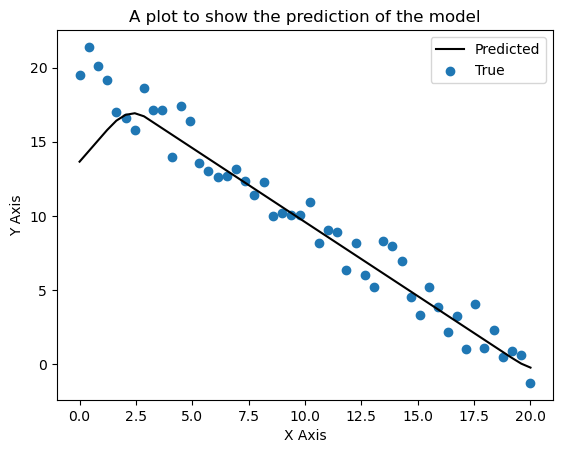

In [7]:
#model makes prediction
y_pred = model.predict(xs)
 
#plot the graph
plt.plot(xs, y_pred, 'k', label='Predicted')
plt.scatter(xs, ys, label='True')
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('A plot to show the prediction of the model')
;

**Functional API with shared Input Layer**

In [8]:
from keras.layers import merge
#create the input layer
input_layer = Input(shape=(1, ))
 
#create two hidden layers with shared input layer
hidden_1 = Dense(64, activation='relu')(input_layer)
hidden_2 = Dense(64, activation='relu')(input_layer)
 
#merge the two layers 
merged_layers = merge.concatenate([hidden_1, hidden_2])
 
#built the rest of the layers
hidden_3 = Dense(32, activation='relu')(merged_layers)
output = Dense(1, activation='linear')(hidden_3)
 
model = Model(inputs=input_layer, outputs=output)

ImportError: cannot import name 'merge' from 'keras.layers' (c:\Users\vipul\anaconda3\lib\site-packages\keras\layers\__init__.py)

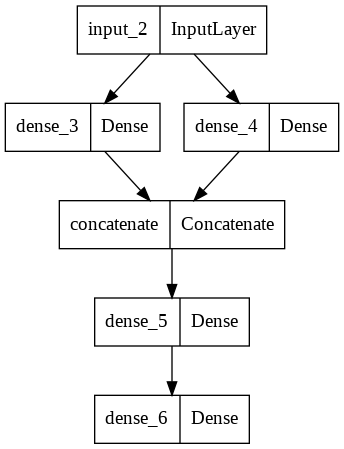

In [ ]:
from keras.utils.vis_utils import plot_model
 
plot_model(model)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 64)           128         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           128         ['input_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 128)          0           ['dense_3[0][0]',                
                                                                  'dense_4[0][0]']          

In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(xs, ys, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 11ms/step - loss: 121.5847
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 114.9899
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 109.9136
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 106.6421
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 104.4721
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 103.6982
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 102.3031
Epoch 8/200
2/2 [==============================] - 0s 11ms/step - loss: 102.1731
Epoch 9/200
2/2 [==============================] - 0s 14ms/step - loss: 102.1293
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 102.3964
Epoch 11/200
2/2 [==============================] - 0s 6ms/step - loss: 102.5891
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 102.7527
Epoch 13/200
2/2 [=============

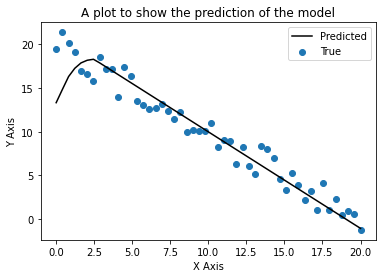

In [ ]:
y_pred = model.predict(xs)
plt.plot(xs, y_pred, 'k', label='Predicted')
plt.scatter(xs, ys, label='True')
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('A plot to show the prediction of the model');